# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 93%|██████████████████████████▉  | 1111117/1194166 [01:01<00:04, 17255.70it/s]

pls   -0.01751
dtype: float64
--------------------------------------
                  date ord_types               close_type      pls
10 2021-04-13 04:55:56      long  simple_slema_move_close -0.00251
11 2021-04-13 12:47:20     short  simple_slema_move_close -0.00340
12 2021-04-15 10:31:14      long               tick_close  0.00392
13 2021-04-16 08:31:43     short  simple_slema_move_close -0.00178
14 2021-04-19 01:12:58      long  simple_slema_move_close -0.00247
15 2021-04-19 07:04:07     short             reverse_stop -0.00400
16 2021-04-19 08:18:01      long       simple_take_profit  0.00401
17 2021-04-21 17:24:40     short  simple_slema_move_close -0.00044
18 2021-04-22 14:03:54      long  simple_slema_move_close -0.00165
19 2021-04-23 07:15:54     short  simple_slema_move_close -0.00330
20 2021-04-26 12:33:41      long               tick_close  0.00253
21 2021-04-27 14:15:38     short  simple_slema_move_close -0.00068
22 2021-04-28 06:29:29      long               sema_close -0

100%|█████████████████████████████| 1194166/1194166 [01:05<00:00, 18108.98it/s]

Wall time: 1min 33s


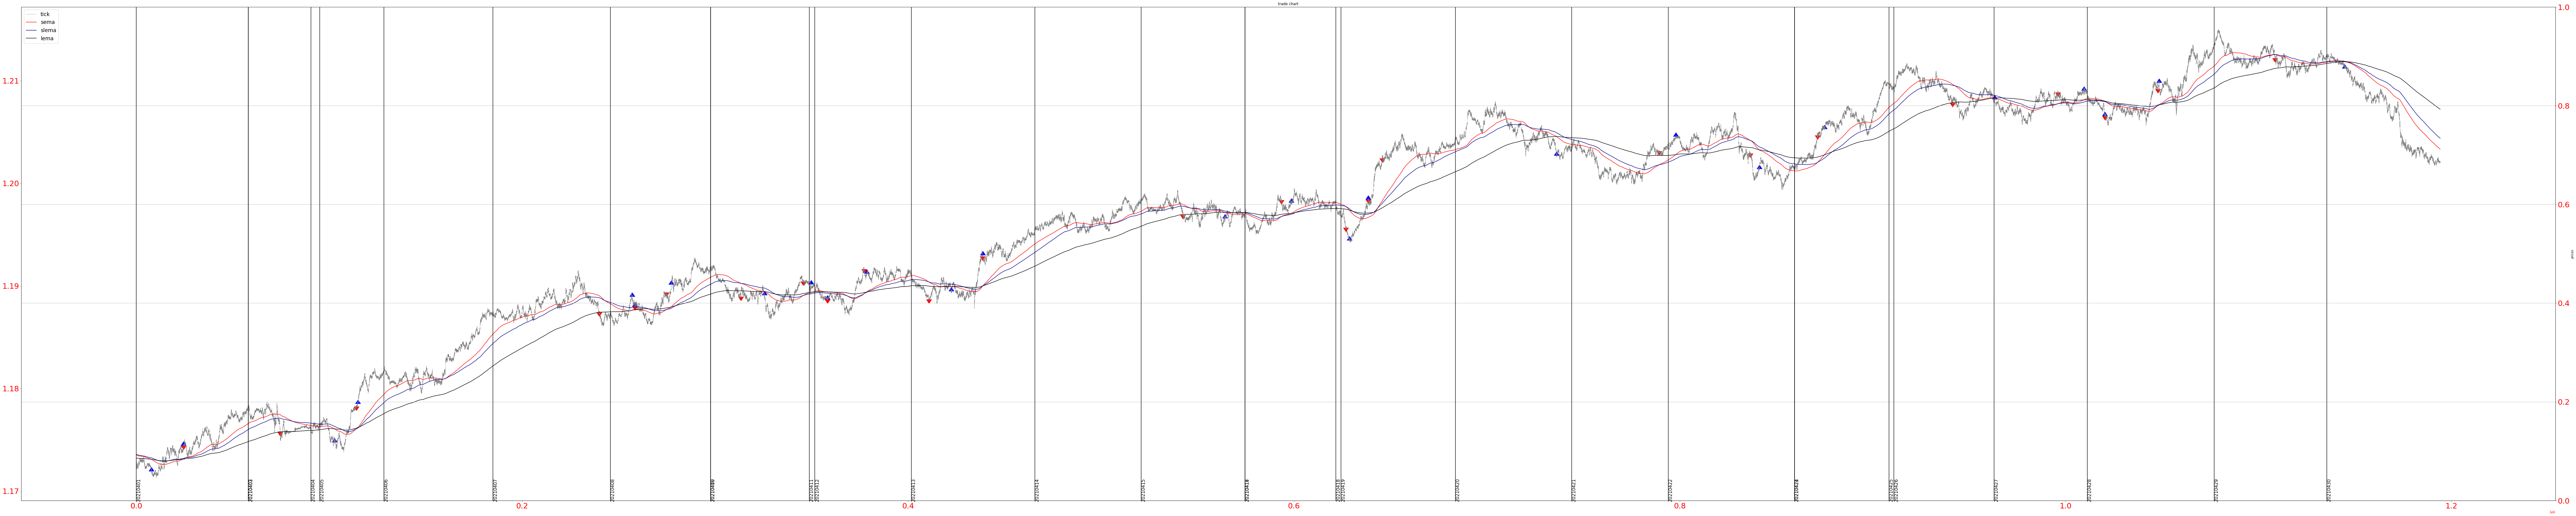

-----------------------------------------------------
date_val          : ['20210401', '20210402', '20210403', '20210404', '20210405', '20210406', '20210407', '20210408', '20210409', '20210410', '20210411', '20210412', '20210413', '20210414', '20210415', '20210416', '20210417', '20210418', '20210419', '20210420', '20210421', '20210422', '20210423', '20210424', '20210425', '20210426', '20210427', '20210428', '20210429', '20210430']
Total PL : -0.017509999999999998
-------------
net_pl            : -0.01751/0.06361
-------------
+ve               : num= 6    sum= +0.02305    avg= +0.00384
-ve               : num= 19    sum= -0.04056    avg= -0.00213
-----------------------------------------------------
month_val
4   -0.01751
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    15
tick_close                  4
sema_close                  4
simple_take_profit          1
reverse_stop                1
Name: close_type, dtype: int64
------

In [3]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')